In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
from jupyterthemes import jtplot
jtplot.reset()

### LINEARITA PREAMPLIFICATORE - FIT LINEARE Vmax vs Qin

In [14]:
# READ DATA
file = '../Data/PreAmp/data_linearita.txt'

data = pd.read_csv(file, sep = ';', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)
data.columns = ['T', 'V', 'errT', 'errV']

In [15]:
# LINEAR FUCTION
def lin(x, a, b):
    return a + b * x

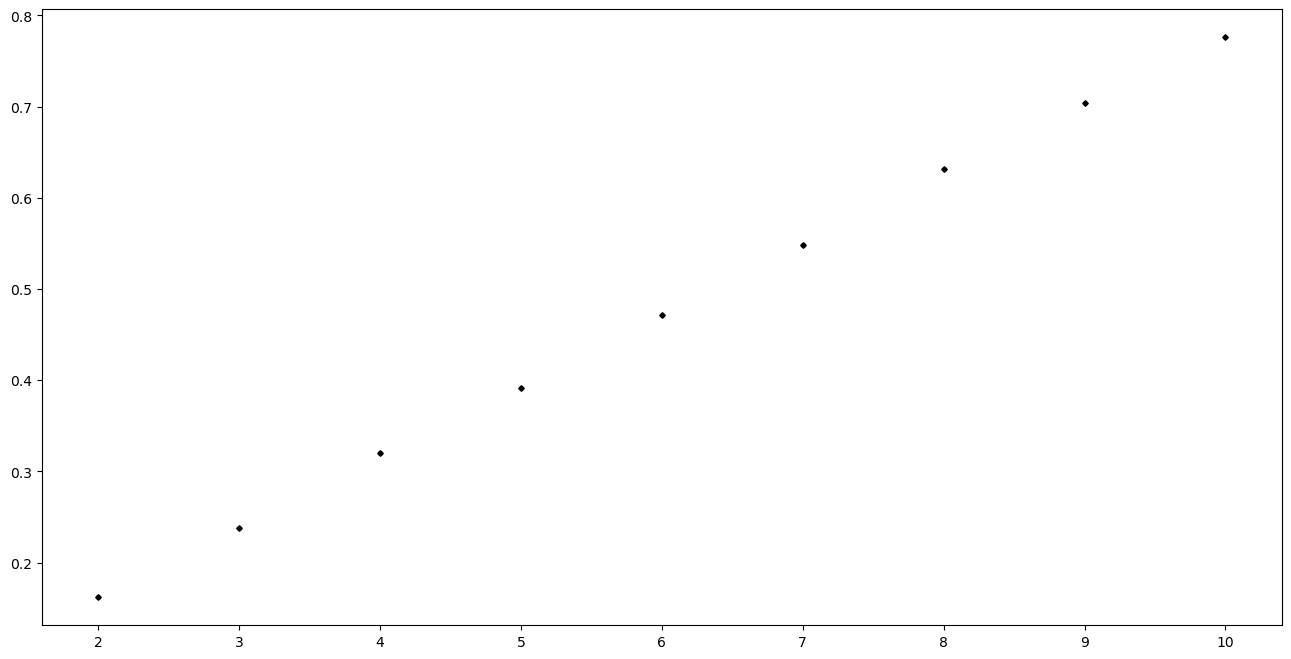

In [22]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)
#ax2 = fig.add_subplot(1, 2, 2)

# PERFORM THE FIT
par_lin, cov_lin = curve_fit(f = lin, xdata = data['T'], ydata = data['V'], sigma = data['errV'], absolute_sigma = True)
func = lin(data['T'], *par_lin)

# PLOT DATA
ax1.errorbar(data['T'],data['V'], xerr=0, yerr=data['errV'], marker = '.',
             elinewidth=0.5, color = '#000000', linewidth=0, capsize=2, label = 'Data')

# PLOT FIT FUNCTION
#ax1.plot(data['T'], func, color = '#FF4B00', linewidth = 2, label = 'Fit')

# COMPUTE RESIDUALS
#res = data['V'] - func

# COMPUTE CHI2
#chi2 = np.sum((res/1)**2) #ci andrebbe l'errore sulle y invece che 1

# DRAW DASHED 'ZERO' LINE
#ax2.axhline(color = '#000000', linewidth = 0.5, linestyle = 'dashed')

# DRAW RESIDUALS
#ax2.errorbar(data['T'], res, xerr=0, yerr=0, marker = '.', elinewidth=0.5, color = '#000000', linewidth=0, capsize=2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
#error = []
#
#for i in range(len(par_lin)):
#    try:
#        error.append(np.absolute(cov_lin[i][i])**0.5)
#    except:
#        error.append( 0.00 )
#
#fit_par = par_lin
#fit_err = np.array(error)
#
#a = fit_par[0]
#b = fit_par[1]
#err_a = fit_err[0]
#err_b = fit_err[1]
#
## MAKE LEGEND
#ax1.legend(loc = 'best', prop = {'size': 18})

plt.show()

### ARDUINO - TEMPO CARATTERISTICO

In [46]:
# READ DATA
file = '../Data/PreAmp/prova_fase_ROOT.dat'

data = pd.read_csv(file, sep = ' ', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)

data.columns = ['time', 'ADC']
data

,time,ADC
1,1,795
2,2,793
3,3,793
4,4,798
5,5,795
...,...,...
2043,2043,793
2044,2044,776
2045,2045,787
2046,2046,788


In [ ]:
# EXPONENTIAL FUCTION
def expo(x, a, b, c):
    return a * np.exp(-b * x) + c

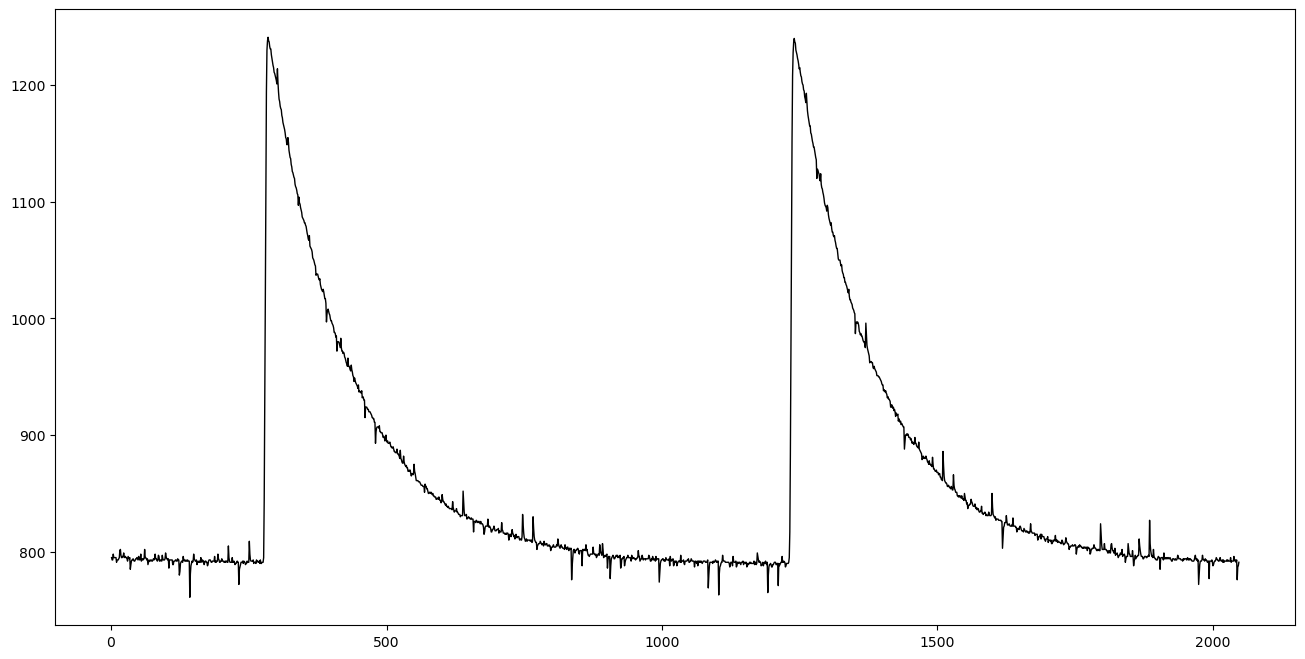

In [47]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)
#ax2 = fig.add_subplot(1, 2, 2)

# PERFORM THE FIT
#par_exp, cov_exp = curve_fit(f = expo, xdata = data['time'], ydata = data['ADC'], sigma = 0, absolute_sigma = True,
#                                p0 = [0.5, 0.01, 1])
#func = expo(data['time'], *par_exp)

# PLOT DATA
ax1.plot(data['time'], data['ADC'], color = '#000000', linewidth=1, label = 'Data')

# PLOT FIT FUNCTION
#ax1.plot(data['time'], func, color = '#FF4B00', linewidth = 2, label = 'Fit')

# COMPUTE RESIDUALS
#res = data['ADC'] - func

# COMPUTE CHI2
#chi2 = np.sum((res/1)**2)

# DRAW DASHED 'ZERO' LINE
#ax2.axhline(color = '#000000', linewidth = 0.5, linestyle = 'dashed')

# DRAW RESIDUALS
#ax2.errorbar(data['Q'], res, xerr=0, yerr=0, marker = '.', elinewidth=0.5, color = '#000000', linewidth=0, capsize=2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
#error = []
#
#for i in range(len(par_exp)):
#    try:
#        error.append(np.absolute(cov_exp[i][i])**0.5)
#    except:
#        error.append( 0.00 )
#
#fit_par = par_exp
#fit_err = np.array(error)
#
#a = fit_par[0]
#b = fit_par[1]
#c = fit_par[2]
#err_a = fit_err[0]
#err_b = fit_err[1]
#err_c = fit_err[2]

# MAKE LEGEND
#ax1.legend(loc = 'best', prop = {'size': 18})

plt.show()

### RISPOSTA IN FREQUENZA - BODE PLOT

In [30]:
# READ DATA
file = '../Data/PreAmp/data_bode.txt'

data = pd.read_csv(file, sep = '\t', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)

data.columns = ['f', 'Vin', 'Vout']

T = data['Vout'] / data['Vin']
data['T'] = T

data['f'] = np.log10(data['f'])
data['T'] = 20 * np.log10(data['T'])

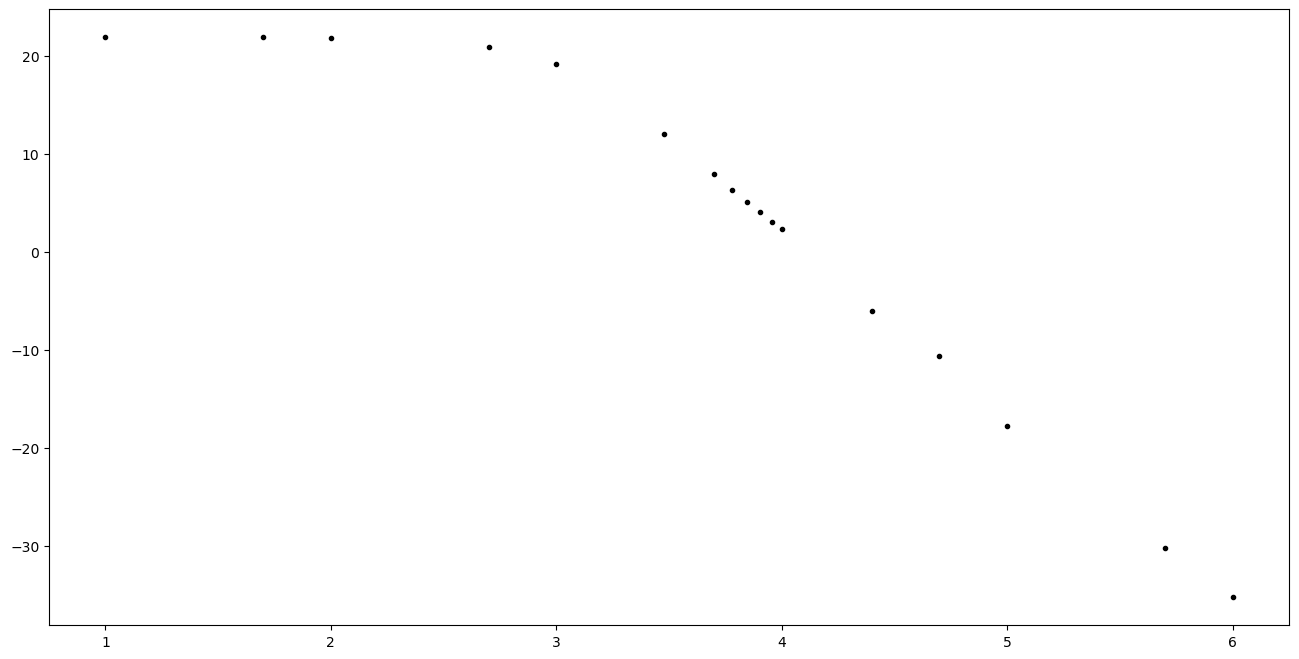

In [31]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(data['f'], data['T'], color = '#000000', linewidth = 0, marker = '.', label = 'Data')

plt.show()